### RNN : Recursive Neural Netowrk : 순환신경망
#### - 출력데이터를 다시 자기 자신 계층으로 전달해서 훈련을 강화한 모델
#### - 어떤 샘플을 처리할 때 바로 이전에 사용했던 데이터를 재사용하는 신경망
#### - RNN은 주로 텍스트분류에 자주 사용
#### - RNN은 SimpleRNN에서 시작해서 향상된 LSTM, GRU 등등의 모델계층이 만들어져 있음
---
### IMDB 영화 리뷰 감상평(긍정/부정) 분류
#### - 총 5만개 데이터 사용
#### - 훈련 및 테스트에 2만 5천건씩
#### - num_words : 전체 데이터셋에서 가장 자주 등장하는 말뭉치 단어 상위 500개의 데이터를 기준으로 분류를 처리하겠다는 의미
#### - 말뭉치 500개를 기준으로 각 데이터 내에 단어와 매칭하여 훈련 및 테스트 데이터를 반환해 줌
#### - 말뭉치 500개는 훈련시에 사용하게 됨
#### - 단어(텍스트) 기반의 데이터 차원은 1차원임

In [1]:
from tensorflow.keras.datasets import imdb

In [2]:
(train_input, train_target),(test_input, test_target) = imdb.load_data(num_words=500)
print(train_input.shape, train_target.shape)
print(test_input.shape, test_target.shape)

17473536/17464789 [==============================] - 2s 0us/step
(25000,) (25000,)
(25000,) (25000,)


In [3]:
train_input

array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
       list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 21, 

In [4]:
# 1: 긍정, 0: 부정
train_target

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [7]:
len(train_input[0]),len(train_input[1])

(218, 189)

###  각 문장의 길이가 다르므로 훈련전에 길이를 통일시켜야 함


In [ ]:
from sklearn.model_selection import train_test_split

In [8]:
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

train_input.shape, val_input.shape, train_target.shape, val_target.shape

((20000,), (5000,), (20000,), (5000,))

### 데이터 정규화 
#### 단어갯수 정규화
#### - 각 문자의 길이가 다르면 훈련에 적용이 안됨(차원이 다름)
####  단어의 갯수를 통일(정규화) 시키기 위한 작업으로는 평균, 중간값, 최소 길이를 확인하여
####  가장 적합한 갯수를 사람이 결정해야 함
#### - 확인하는 방법 붕에 평균과 중간값을 이용하여 확인하는 것이 빠르게 결정할 수 있음

---

#### 각 문장(샘플)의 길이를 넘파이 배열로 추출

In [11]:
import numpy as np
lengths = np.array([len(x) for x in train_input])
lengths, lengths.shape

(array([259, 520, 290, ..., 300,  70,  77]), (20000,))

#### 전체 평균과 중간값 확인

In [12]:
np.mean(lengths), np.median(lengths)

(239.00925, 178.0)

#### 그래프로 값 편중도 확인
####  - 중앙값이 평군보다 작기 때문에 한쪽(왼쪽)으로 길이의 편중이 심해보임

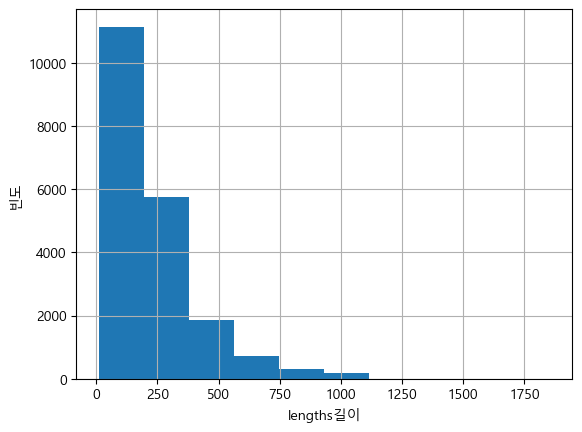

In [13]:
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
plt.rc('font', family = 'Malgun Gothic')

# 히스토그램 그리기
plt.hist(lengths)
plt.xlabel('lengths길이')
plt.ylabel('빈도')
plt.grid()
plt.show()

#### 각 문장의 길이를 100정도로 통일(정규화)
#### - pad_sequences : 데이터의 길이를 고정하는 라이브러리

In [23]:
from tensorflow.keras.preprocessing.sequence import pad_sequences


#### train_seq = pad_sequences(train_input, maxlen = 100)
#### pad_sequences : 길이가 100보다 큰 경우는 뒤에서부터 100개를 추출하고 길이가 작은경우는 왼쪽편에 0으로 채움
#### padding = 'pre' : 앞쪽 자르기, 'post' : 뒤쪽 자르기   default : pre
#### truncating = 'pre' : 앞쪽 채우기, 'post' : 뒤쪽 채우기 default : pre

In [25]:
train_seq = pad_sequences(train_input, maxlen=100)

train_seq = pad_sequences(train_input, 
                          maxlen=100,
                         padding='pre',
                         truncating='pre')

In [16]:
len(train_seq[0]), len(train_seq[1])

(100, 100)

In [17]:
train_seq

array([[ 10,   4,  20, ...,  10, 470, 158],
       [206,   2,  26, ...,   6,   2,   2],
       [  2,   7,   2, ...,   2,   2,  12],
       ...,
       [  2,  37, 299, ...,   7,  14,   2],
       [  0,   0,   0, ...,  25, 170,   2],
       [  0,   0,   0, ...,  25, 194,   2]])

In [18]:
len(train_input[0]),len(train_seq[0])

(259, 100)

In [21]:
len(train_input[19999]),len(train_seq[19999])

(77, 100)

In [22]:
train_input[0]

[1,
 73,
 89,
 81,
 25,
 60,
 2,
 6,
 20,
 141,
 17,
 14,
 31,
 127,
 12,
 60,
 28,
 2,
 2,
 66,
 45,
 6,
 20,
 15,
 497,
 8,
 79,
 17,
 491,
 8,
 112,
 6,
 2,
 20,
 17,
 2,
 2,
 4,
 436,
 20,
 9,
 2,
 6,
 2,
 7,
 493,
 2,
 6,
 185,
 250,
 24,
 55,
 2,
 5,
 23,
 350,
 7,
 15,
 82,
 24,
 15,
 2,
 66,
 10,
 10,
 45,
 2,
 15,
 4,
 20,
 2,
 8,
 30,
 17,
 2,
 5,
 2,
 17,
 2,
 190,
 4,
 20,
 9,
 43,
 32,
 99,
 2,
 18,
 15,
 8,
 157,
 46,
 17,
 2,
 4,
 2,
 5,
 2,
 9,
 32,
 2,
 5,
 2,
 267,
 17,
 73,
 17,
 2,
 36,
 26,
 400,
 43,
 2,
 83,
 4,
 2,
 247,
 74,
 83,
 4,
 250,
 2,
 82,
 4,
 96,
 4,
 250,
 2,
 8,
 32,
 4,
 2,
 9,
 184,
 2,
 13,
 384,
 48,
 14,
 16,
 147,
 2,
 59,
 62,
 69,
 2,
 12,
 46,
 50,
 9,
 53,
 2,
 74,
 2,
 11,
 14,
 31,
 151,
 10,
 10,
 4,
 20,
 9,
 2,
 364,
 352,
 5,
 45,
 6,
 2,
 2,
 33,
 269,
 8,
 2,
 142,
 2,
 5,
 2,
 17,
 73,
 17,
 204,
 5,
 2,
 19,
 55,
 2,
 2,
 92,
 66,
 104,
 14,
 20,
 93,
 76,
 2,
 151,
 33,
 4,
 58,
 12,
 188,
 2,
 151,
 12,
 215,
 69,
 224,
 142,


### 순환신경망 생성
#### - 순환신경망 처리방식 2가지
#### 1. 원핫 인코딩 방식
#### - 1개의 단어 분석을 위해 500개의 원핫인코딩된 데이터 사용
#### - 너무 많은 공간이 필요한 단점이 있음
#### - 원핫인코딩은 keras.util.to_categorical()함수를 사용하여 데이터 생성

#### 2. 단어 임베딩 방식
#### - 원핫인코딩 방식을 개선한 방법
#### - 많은 공간을 필요로 하지 않음
#### - 임베딩 레이어 계층을 사용하여 자동으로 처리]
#### - keras.layers.Embedding()계층을 추가하여 사용
---
### 모델생성

In [26]:
from tensorflow import keras


In [27]:
model = keras.Sequential()

#### RNN 계층추가
#### - 첫번째 인자 8 : 사용할 뉴런 출력으로 사용할 데이터(종속변수) 갯수
#### - 두번째 인자 100 : 샘플(문장) 각각의 단어 갯수
####                       500 : 사용할 말뭉치 갯수
####                       500개 말뭉치 공간에는 원핫인코딩된 데이터 들어갈 공간임

In [28]:
model.add(keras.layers.SimpleRNN(8, input_shape=(100,500)))

#### 출력계층 추가하기

In [29]:
model.add(keras.layers.Dense(1, activation='sigmoid'))